# Problem: Predict rain on a given date.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv('seattleweather1948-2017_1716911480863.csv')

In [5]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [7]:
data.shape

(25551, 5)

In [8]:
data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [9]:
data.RAIN.value_counts()

RAIN
False    14648
True     10900
Name: count, dtype: int64

In [10]:
data[data['PRCP'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [11]:
data[data['RAIN'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [12]:
data.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [13]:
data.shape

(25551, 5)

In [14]:
data['PRCP'].fillna(data['PRCP'].mean(), inplace= True)

In [15]:
data['RAIN'].fillna(data['RAIN'].mode()[0], inplace= True)

In [16]:
data['PRCP'].isna().sum()

0

In [17]:
data['RAIN'].isna().sum()

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25551 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25551 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 823.5+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [20]:
data['RAIN']= le.fit_transform(data['RAIN'])

In [21]:
data['RAIN'].dtypes

dtype('int64')

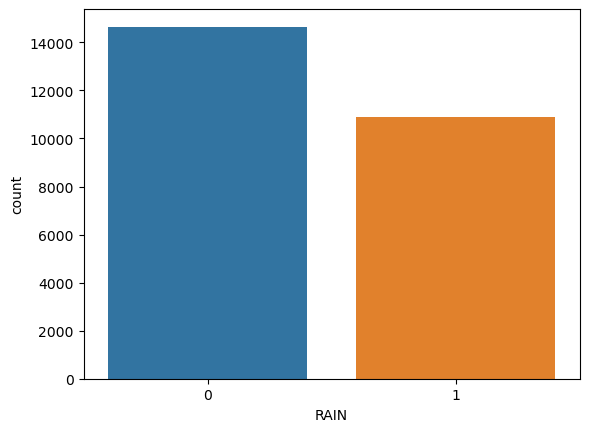

In [22]:
sns.countplot(x= 'RAIN', data= data)
plt.show()

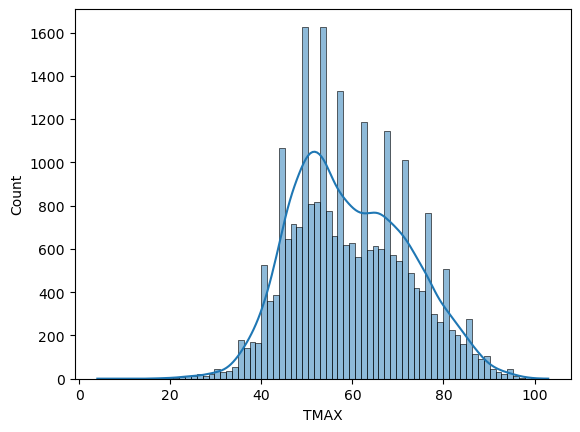

In [23]:
import warnings
warnings.filterwarnings('ignore')

sns.histplot(data['TMAX'], kde= True)
plt.show()

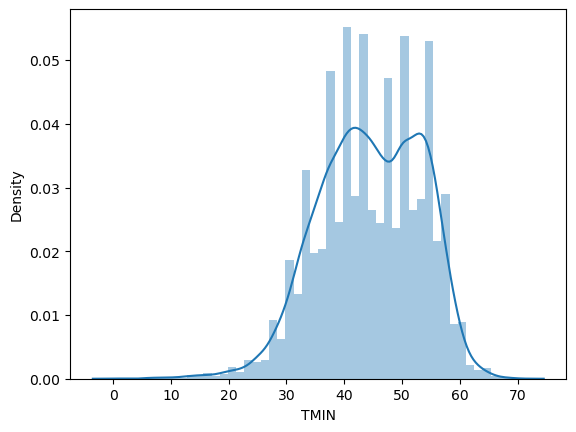

In [24]:
sns.distplot(data['TMIN'])
plt.show()

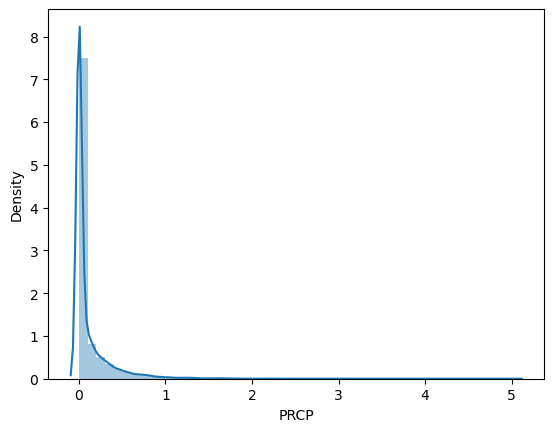

In [25]:
sns.distplot(data['PRCP'])
plt.show()

In [26]:
data.describe()

,PRCP,TMAX,TMIN,RAIN
count,25551.000000,25551.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226,0.426598
std,0.239017,12.772984,8.892836,0.494592
min,0.000000,4.000000,0.000000,0.000000
25%,0.000000,50.000000,38.000000,0.000000
50%,0.000000,58.000000,45.000000,0.000000
75%,0.100000,69.000000,52.000000,1.000000
max,5.020000,103.000000,71.000000,1.000000


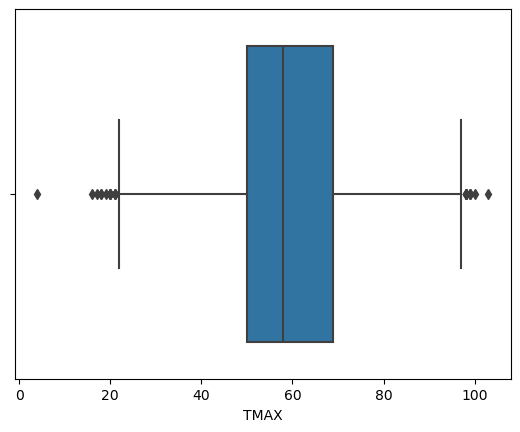

In [27]:
sns.boxplot(x= data['TMAX'])
plt.show()

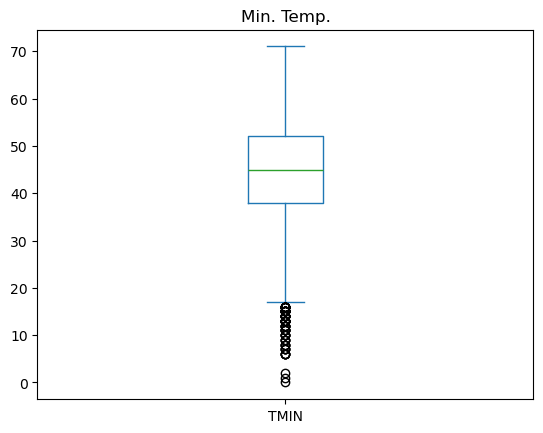

In [28]:
data['TMIN'].plot(kind= 'box', title= 'Min. Temp.')
plt.show()

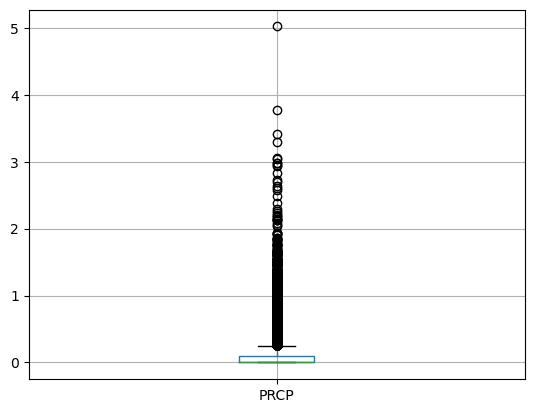

In [29]:
data.boxplot(column= 'PRCP')
plt.show()

In [30]:
def outlier_removal(data, col):
    Q1= data[col].quantile(0.25)
    Q3= data[col].quantile(0.75)
    IQR= Q3-Q1
    data=data.loc[~((data[col] < (Q1-3*IQR))|(data[col]> (Q3+3*IQR))),]
    return data

In [31]:
data= outlier_removal(data,'PRCP')
data= outlier_removal(data,'TMAX')
data= outlier_removal(data,'TMIN')

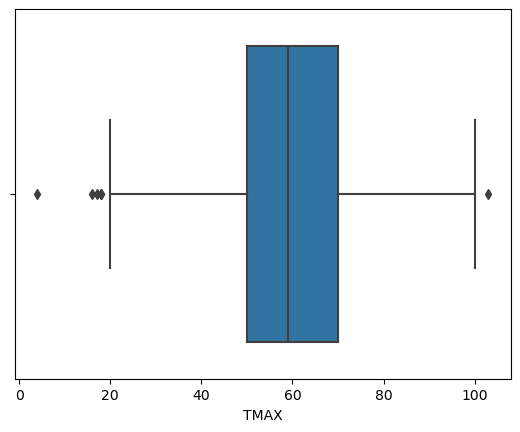

In [32]:
sns.boxplot(x= data['TMAX'])
plt.show()

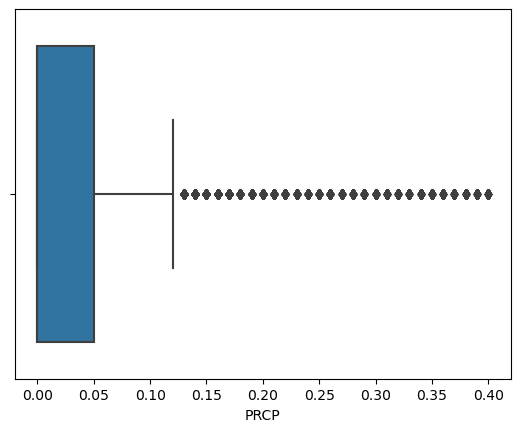

In [33]:
sns.boxplot(x= data['PRCP'])
plt.show()

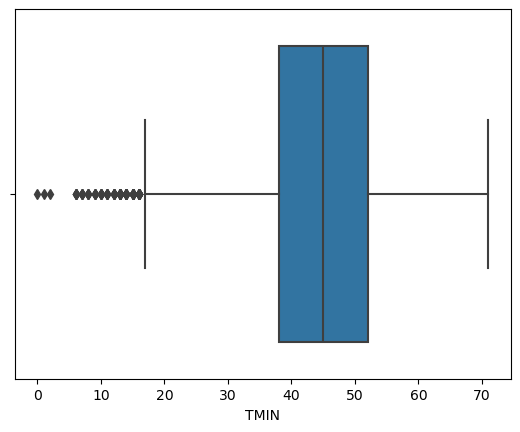

In [34]:
sns.boxplot(x= data['TMIN'])
plt.show()

In [35]:
data.shape

(23451, 5)

In [36]:
data.drop(data[(data['TMAX']>101) | (data['TMAX']<19)].index, inplace= True)

In [37]:
data.drop(data[(data['TMIN']<17)].index, inplace= True)

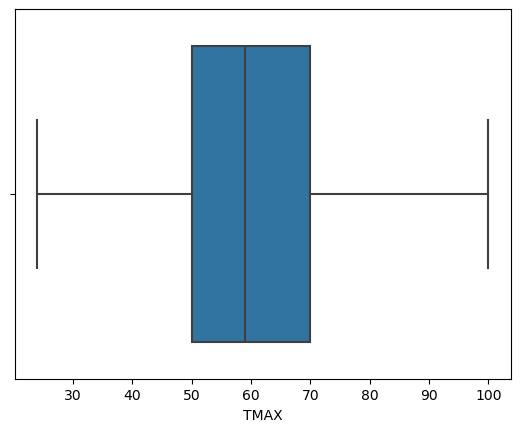

In [38]:
sns.boxplot(x= data['TMAX'])
plt.show()

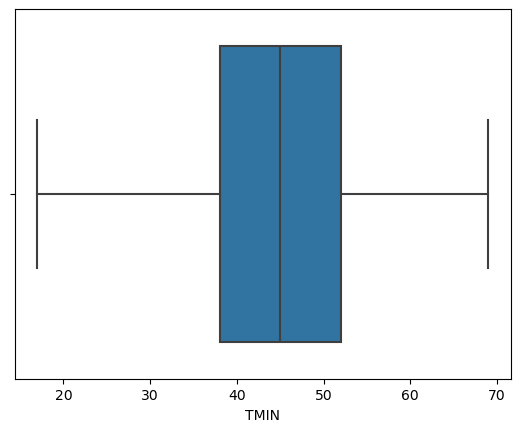

In [39]:
sns.boxplot(x= data['TMIN'])
plt.show()

In [40]:
data.shape

(23360, 5)

In [41]:
x= data[['TMIN', 'TMAX','PRCP']]
y= data['RAIN']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, train_size= 0.70, random_state= 42)

In [43]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [44]:
lr.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred= lr.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
r2= accuracy_score(y_test, y_pred)
r2

0.9179626194892281

In [47]:
lr.classes_

array([0, 1], dtype=int64)

In [48]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [49]:
lr.predict_proba(x_test)

array([[0.89825784, 0.10174216],
       [0.95117608, 0.04882392],
       [0.00400073, 0.99599927],
       ...,
       [0.97750425, 0.02249575],
       [0.02459225, 0.97540775],
       [0.8292687 , 0.1707313 ]])

In [50]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[4336,   25],
       [ 550, 2098]], dtype=int64)

In [51]:
acc= (4336 + 2098) / (4336 + 2098 + 550 + 25)
acc

0.9179626194892281

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4361
           1       0.99      0.79      0.88      2648

    accuracy                           0.92      7009
   macro avg       0.94      0.89      0.91      7009
weighted avg       0.93      0.92      0.92      7009



In [53]:
x_new= [[0.0, 50, 40]]
pred_new= lr.predict(x_new)
pred_new

array([1], dtype=int64)

In [54]:
lr.predict_proba(x_new)

array([[0., 1.]])

In [55]:
'End Session'

'End Session'